##Necessary imports

In [300]:
!pip install missingno
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.metrics import f1_score, confusion_matrix , classification_report
from sklearn.neural_network import MLPClassifier
from sklearn import metrics, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from numpy import std, mean

#Load data

In [301]:
xlx_path = '/content/drive/MyDrive/data.xlsx'
df = pd.read_excel(xlx_path, index_col=0)
df

,Gender,Nationality,Major,Level,IE1,SMSK3,RAS1,RAS2,SMSK1,SMSK4,IE2,TL1,RAS3,IE3,RAS4,RAS5,IE4,SMSK2,TL2,TL3,PSD1,PSD2,PSD3,IE5,PSD4,PSD5,IM1,IM2,IM3,IM4,IM5,IM6,W1,W2,W3,Employed,Score,Class
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,2,4,3,4,4,2,3,3,3,4,3,3,2,4,3,3,4,3,3,4,3,3,3,4,4,4,4,4,4,4.0,4.0,4.0,1.0,3.20,1
2,0,0,0,2,4,4,4,4,3,3,4,4,3,4,4,2,4,4,4,4,4,3,3,4,4,3,3,4,4,3,4,4,3.0,4.0,3.0,0.0,3.82,1
3,0,1,0,1,3,2,3,4,3,3,4,2,4,3,3,2,3,3,2,3,2,3,3,3,3,3,4,4,3,4,4,3,4.0,4.0,2.0,1.0,3.75,1
4,1,1,1,3,4,4,4,4,4,3,4,4,4,4,4,3,4,3,3,4,3,4,3,3,4,4,4,4,4,4,4,4,3.0,4.0,4.0,1.0,3.70,1
5,0,0,0,2,4,3,3,4,3,3,4,4,4,3,3,3,3,3,3,3,4,3,4,3,3,4,3,3,4,3,3,3,4.0,4.0,2.0,1.0,3.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,1,0,1,2,4,4,4,4,4,4,4,4,4,4,4,2,4,4,4,4,4,4,4,3,3,4,4,4,4,4,4,4,4.0,4.0,4.0,1.0,3.34,1
257,0,0,0,1,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,4,4,4,4,4,4.0,4.0,NaN,0.0,3.18,1
258,0,0,0,1,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3,1,3,3,3,3,3,3,3,3,NaN,3.0,NaN,0.0,3.97,0


##Data visualization to explore the dataset and identify data issues

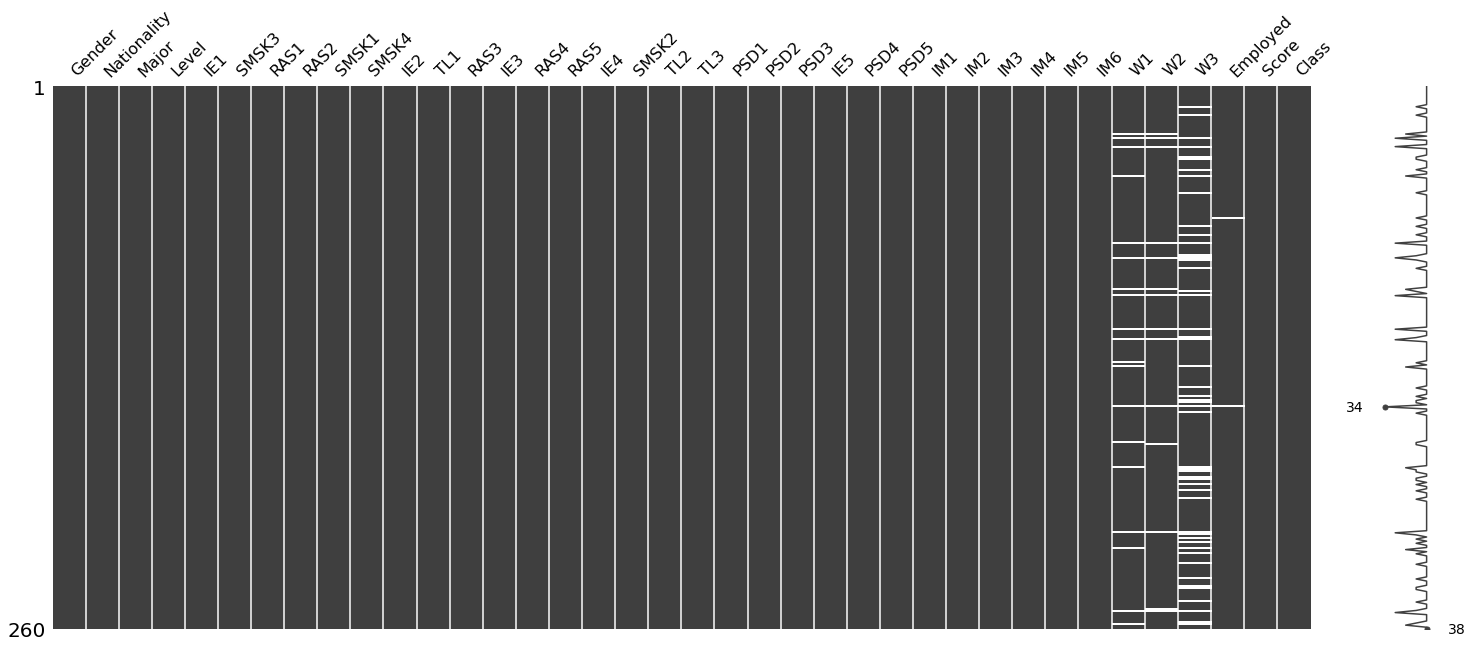

In [302]:
msno.matrix(df)

In [303]:
df.columns

Index(['Gender', 'Nationality', 'Major', 'Level', 'IE1', 'SMSK3', 'RAS1',
       'RAS2', 'SMSK1', 'SMSK4', 'IE2', 'TL1', 'RAS3', 'IE3', 'RAS4', 'RAS5',
       'IE4', 'SMSK2', 'TL2', 'TL3', 'PSD1', 'PSD2', 'PSD3', 'IE5', 'PSD4',
       'PSD5', 'IM1', 'IM2', 'IM3', 'IM4', 'IM5', 'IM6', 'W1', 'W2', 'W3',
       'Employed', 'Score', 'Class'],
      dtype='object')

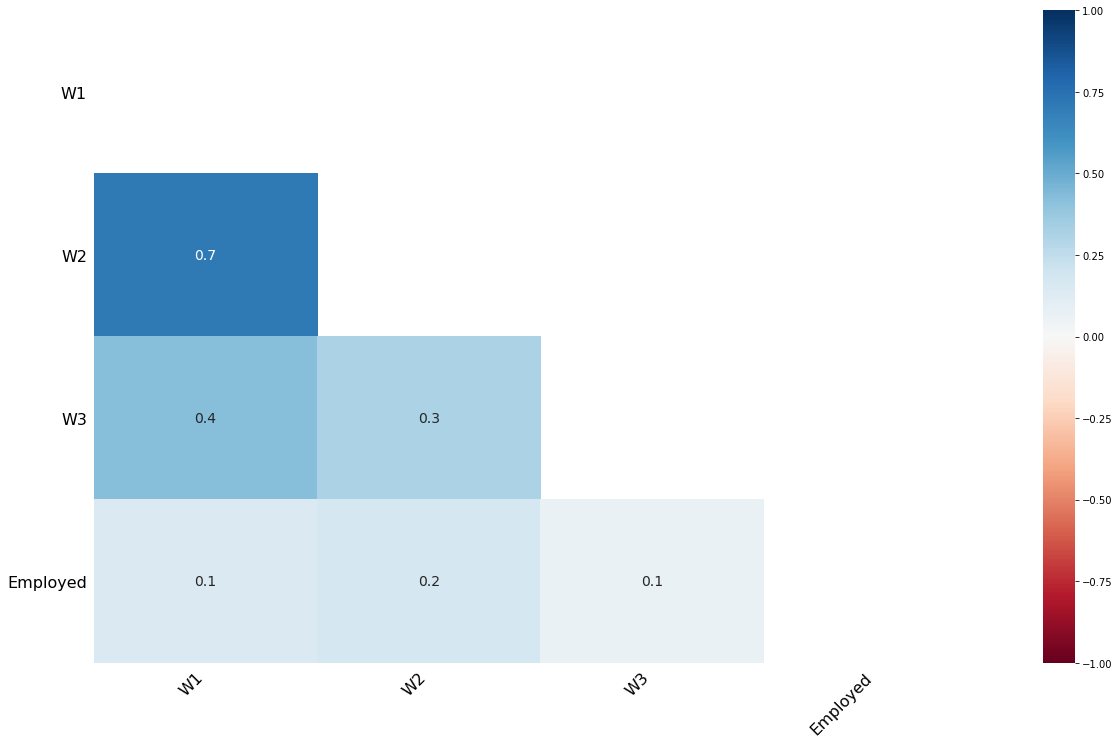

In [304]:
msno.heatmap(df)

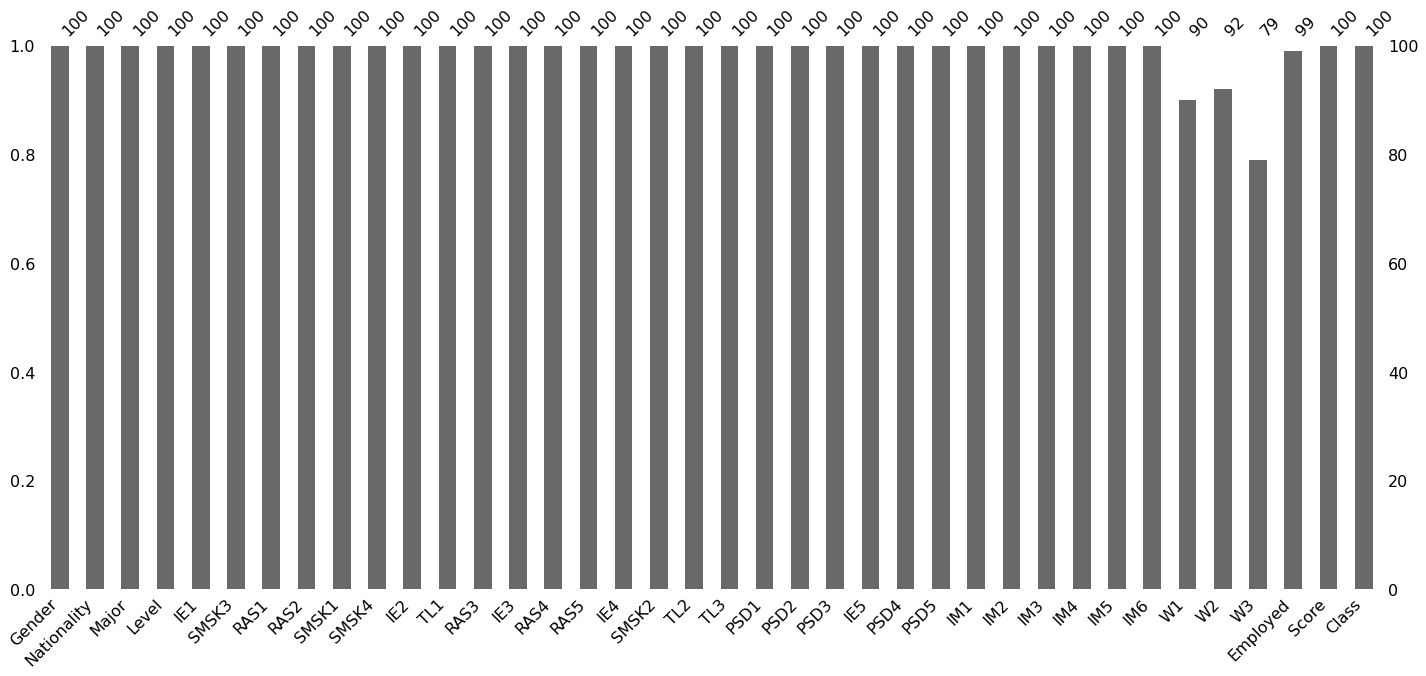

In [305]:
msno.bar(df.sample(100))

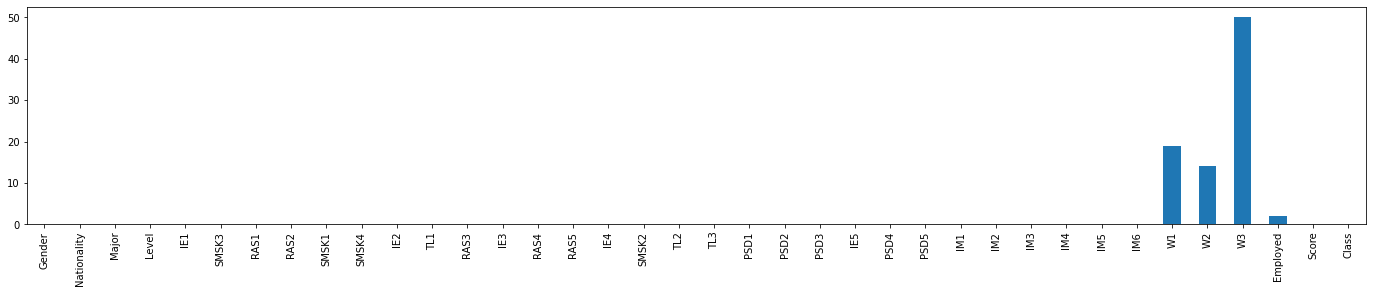

In [306]:
df.isnull().sum().plot.bar(figsize=(24,4))

=> We have Nan values in the columns 'W1' W2' W3' and 'Employed'.  

#### Let's modify the Nan values with the mean integer value of each row. 

In [307]:
print(df['W1'].isna().sum())
print(df['W2'].isna().sum())
print(df['W3'].isna().sum())
print(df['Employed'].isna().sum())

df['W3'].mean(axis = 0) 
df['W2'].mean(axis = 0) 
df['W1'].mean(axis = 0) 
df['Employed'].mean(axis = 0)

df['W3'] = df['W3'].fillna(3.0)
df['W2'] = df['W2'].fillna(3.0)
df['W1'] = df['W1'].fillna(3.0)
df['Employed'] = df['Employed'].fillna(1.0)

df['W1'] = df['W1'].astype(int)
df['W2'] = df['W2'].astype(int)
df['W3'] = df['W3'].astype(int)
df['Employed'] = df['Employed'].astype(int)

19
14
50
2


#### Let's remove the duplicate rows

In [308]:
initial_length = len(df)
print('initial length = {}'.format(len(df)))
df = df.drop_duplicates()
without_duplicate_rows_length = len(df)
print('without duplicate rows length = {}'.format(len(df)))
num_duplicate_rows = initial_length - without_duplicate_rows_length
print('num_duplicate_rows = {}'.format(num_duplicate_rows))

initial length = 260
without duplicate rows length = 246
num_duplicate_rows = 14


=> 14 duplicated rows are removed. 

#### Let's visualize our target column.

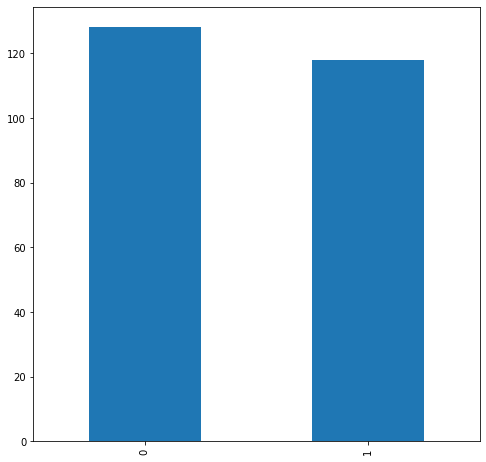

In [309]:
# Bar Pllot
df['Class'].value_counts().plot.bar(figsize=(8,8))

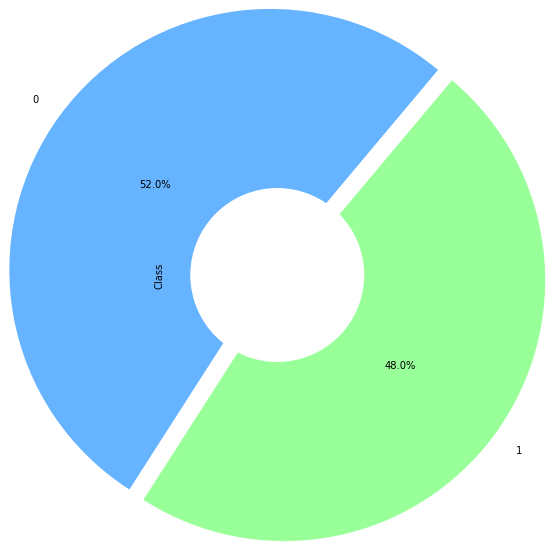

In [310]:
# Pie chart
sizes = df['Class'].value_counts()
#colors
colors = ['#66b3ff', '#99ff99']
#explsion
explode = (0.1,0.1)
sizes.plot.pie( colors = colors, autopct='%1.1f%%',radius=3, startangle=50, pctdistance=0.55, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),1,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

#Data pre-processing

For first stage we just split the target apart.

In [311]:
#Data integer conversion
df = df.astype(int)
#Train-Target Split
X = df.drop('Class', axis=1) #train
y = df['Class'] #target

In [312]:
len(X)

246

In [313]:
len(y)

246

Train-Test split 70% - 30%

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
#Data Min-Max Normalization
scalar = MinMaxScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)

Data normalization for K-Fold analysis

In [315]:
#Data Min-Max Normalization
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)

#Supervised Machine Learning Models

Let's join all results together within a dataFrame.

In [316]:
results_dataFrame= pd.DataFrame()

##Decision Tree

###Train-Test-Split Decision Tree Model

In [317]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf_f1_score = f1_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 44]
 [ 0 30]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.41      1.00      0.58        30

    accuracy                           0.41        74
   macro avg       0.20      0.50      0.29        74
weighted avg       0.16      0.41      0.23        74



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###K-Fold Decision Tree

In [318]:
kf = KFold(n_splits=4) # Define the split - into 4 folds 
kf.get_n_splits(X)  # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=4, random_state=None, shuffle=False)


Cross-validated scores: [0.93548387 0.93548387 0.95081967 0.86885246]
Accuracy: 0.923 (0.032)
k_fold_mean_scores = 0.861448968799577
conf_mat =  [[118  10]
 [  9 109]]


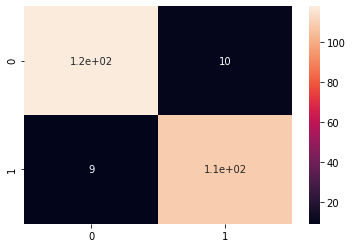

In [319]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X, y)
# Perform 4-fold cross validation
scores = cross_val_score(clf, X, y, cv=kf)
print("Cross-validated scores:", scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
clf_k_fold_mean_scores=(mean(scores))
print('k_fold_mean_scores =', k_fold)
y_pred = cross_val_predict(clf, X, y, cv=kf)
conf_mat = confusion_matrix(y, y_pred)
print('conf_mat = ',conf_mat)
f = sns.heatmap(conf_mat, annot=True)

In [320]:
new_row = {'Model':'DecTree','K-fold_Accuracy':clf_k_fold_mean_scores, 'F1_score':clf_f1_score}

#append row to the dataframe
results_dataFrame = results_dataFrame.append(new_row, ignore_index=True)

##Support Vector Machine (SVM) Model

###Train-Test-Split SVM

In [321]:
svclassifier = SVC(kernel='poly', C=100,gamma=10).fit(X_train, y_train)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
svm_f1_score = f1_score(y_test, y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 0 44]
 [ 0 30]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.41      1.00      0.58        30

    accuracy                           0.41        74
   macro avg       0.20      0.50      0.29        74
weighted avg       0.16      0.41      0.23        74



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###K-Fold SVM

Cross-validated scores: [0.85483871 0.87096774 0.93442623 0.81967213]
Accuracy: 0.870 (0.042)
k_fold_mean_scores = 0.861448968799577
conf_mat =  [[112  16]
 [ 16 102]]


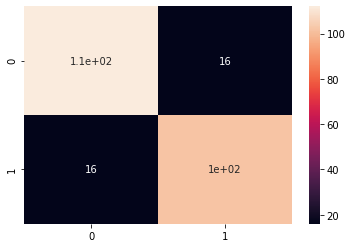

In [322]:
Kfold_svclassifier = SVC(kernel='poly', C=100,gamma=10).fit(X, y)
# Perform 4-fold cross validation
scores = cross_val_score(Kfold_svclassifier, X, y, cv=kf)
print("Cross-validated scores:", scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
svm_k_fold_mean_scores=(mean(scores))
print('k_fold_mean_scores =', k_fold)
y_pred = cross_val_predict(Kfold_svclassifier, X, y, cv=kf)
conf_mat = confusion_matrix(y, y_pred)
print('conf_mat = ',conf_mat)
f = sns.heatmap(conf_mat, annot=True)

In [323]:
new_row = {'Model':'SVM','K-fold_Accuracy':svm_k_fold_mean_scores, 'F1_score':svm_f1_score}

#append row to the dataframe
results_dataFrame = results_dataFrame.append(new_row, ignore_index=True)

##Naive Bayes (NB) Model

###Train-Test-Split NB

In [324]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
nb_f1_score = f1_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44  0]
 [30  0]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.75        44
           1       0.00      0.00      0.00        30

    accuracy                           0.59        74
   macro avg       0.30      0.50      0.37        74
weighted avg       0.35      0.59      0.44        74



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###K-Fold NB

Cross-validated scores: [0.80645161 0.83870968 0.86885246 0.81967213]
Accuracy: 0.833 (0.023)
k_fold_mean_scores = 0.861448968799577
conf_mat =  [[106  22]
 [ 19  99]]


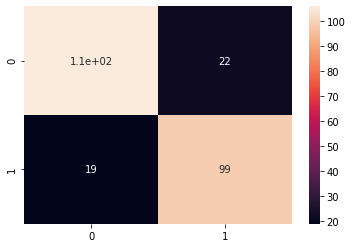

In [325]:
# Perform 4-fold cross validation
gnb = GaussianNB()
gnb = gnb.fit(X, y)
scores = cross_val_score(gnb, X, y, cv=kf)
print("Cross-validated scores:", scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
nb_k_fold_mean_scores=(mean(scores))
print('k_fold_mean_scores =', k_fold)
y_pred = cross_val_predict(gnb, X, y, cv=kf)
conf_mat = confusion_matrix(y, y_pred)
print('conf_mat = ',conf_mat)
f = sns.heatmap(conf_mat, annot=True)

In [326]:
new_row = {'Model':'NB','K-fold_Accuracy':nb_k_fold_mean_scores, 'F1_score':nb_f1_score}

#append row to the dataframe
results_dataFrame = results_dataFrame.append(new_row, ignore_index=True)

##Multilayer Perceptron (MLP) Model 

###Train-Test-Split MLP

In [327]:
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
MLP.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
mlp_f1_score = f1_score(y_test, y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 0 44]
 [ 0 30]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.41      1.00      0.58        30

    accuracy                           0.41        74
   macro avg       0.20      0.50      0.29        74
weighted avg       0.16      0.41      0.23        74



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###K-Fold MLP

Cross-validated scores: [0.87096774 0.93548387 0.86885246 0.7704918 ]
Accuracy: 0.861 (0.059)
k_fold_mean_scores = 0.861448968799577
conf_mat =  [[108  20]
 [ 14 104]]


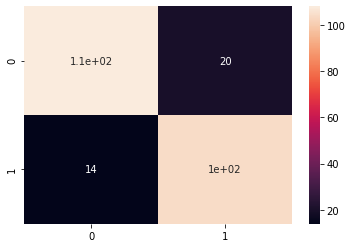

In [328]:
# Perform 4-fold cross validation
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
MLP = MLP.fit(X, y)
scores = cross_val_score(MLP, X, y, cv=kf)
print("Cross-validated scores:", scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
mlp_k_fold_mean_scores=(mean(scores))
print('k_fold_mean_scores =', k_fold)
y_pred = cross_val_predict(MLP, X, y, cv=kf)
conf_mat = confusion_matrix(y, y_pred)
print('conf_mat = ',conf_mat)
f = sns.heatmap(conf_mat, annot=True)

In [329]:
new_row = {'Model':'MLP','K-fold_Accuracy':mlp_k_fold_mean_scores, 'F1_score':mlp_f1_score}

#append row to the dataframe
results_dataFrame = results_dataFrame.append(new_row, ignore_index=True)

In [330]:
results_dataFrame

,F1_score,K-fold_Accuracy,Model
0,0.576923,0.922660,DecTree
1,0.576923,0.869976,SVM
2,0.000000,0.833421,NB
3,0.576923,0.861449,MLP


# Decision Tree outperforms all other models.